# Bitcoin data from web, api and a flat file - evaluation


## Jyothi Samudrala

## Summary of work

1.	Loaded data from various data extracts – flatfile, web and api – into dataframes

2.	Renamed, subsetted and standardized the data type on these dataframes

3.	Loaded them into a sqllite database named bitcoin.db

4.	Combined them into a table called "final" using Python

    a.	Web data was appended to flatfile data
    
    b.	The combination of webdata and flatfile data was inner joined on api data
    
    
5.	Ensured there were no duplicates (where applicable) and no null values in the “final” table

6.	Created visualizations on the combined table “final”


## Preparing the Database

In [1]:
import pandas as pd

# Loading the dataset from various milestones


flatfile_bitcoin_df = pd.read_csv("flatfile_milestone2_bitcoin.csv")
web_bitcoin_df = pd.read_csv("web_milestone3_bitcoin.csv")
api_bitcoin_df = pd.read_csv("api_noduplicates_milestone4_bitcoin.csv")


In [2]:
# Viewing data from these dataframes

flatfile_bitcoin_df.head(5)


,currency,date_time,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
0,Bitcoin,2013-12-27 23:59:59,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09
1,Bitcoin,2013-12-28 23:59:59,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09
2,Bitcoin,2013-12-29 23:59:59,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09
3,Bitcoin,2013-12-30 23:59:59,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09
4,Bitcoin,2013-12-31 23:59:59,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09


In [3]:
web_bitcoin_df.head(5)


,currency,date_time,open_price_usd,high_price_usd,low_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
0,Bitcoin,2021-07-18,31533.884720,32398.995186,31215.492310,31796.810138,1.878799e+10,5.965133e+11
1,Bitcoin,2021-07-17,31397.308600,31935.944392,31223.990873,31533.067533,1.889502e+10,5.915365e+11
2,Bitcoin,2021-07-16,31841.551324,32218.406612,31100.673372,31421.538454,2.369948e+10,5.894158e+11
3,Bitcoin,2021-07-15,32827.874549,33159.640948,31175.709747,31780.731374,2.130052e+10,5.961245e+11
4,Bitcoin,2021-07-14,32723.846052,33061.398956,31639.124106,32822.348737,2.137653e+10,6.156350e+11


In [4]:
api_bitcoin_df.head(5)


,time,sentiment,social_score
0,2021-05-12,3.0,746648.0
1,2020-03-20,4.0,540086.0
2,2021-05-24,3.0,403736.0
3,2021-01-21,3.0,327435.0
4,2021-05-20,4.0,310832.0


In [5]:
# Cleaning up flatfile data
import datetime as dt
# Converting string object to date time object
flatfile_bitcoin_df['date_time']= pd.to_datetime(flatfile_bitcoin_df['date_time'])


In [6]:
# Standardizing time format 
flatfile_bitcoin_df['date_time'] = flatfile_bitcoin_df['date_time'].dt.strftime('%Y-%m-%d')
flatfile_bitcoin_df.head(5)

,currency,date_time,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
0,Bitcoin,2013-12-27,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09
1,Bitcoin,2013-12-28,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09
2,Bitcoin,2013-12-29,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09
3,Bitcoin,2013-12-30,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09
4,Bitcoin,2013-12-31,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09


In [7]:
# subsetting only to required fields
flatfile_bitcoin_df = flatfile_bitcoin_df[['date_time','high_price_usd','low_price_usd','open_price_usd','close_price_usd','trade_volume_usd','marketcap_usd']]
flatfile_bitcoin_df.head(5)

,date_time,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
0,2013-12-27,777.510010,713.599976,763.280029,735.070007,46862700.0,8.955395e+09
1,2013-12-28,747.059998,705.349976,737.979980,727.830017,32505800.0,8.869919e+09
2,2013-12-29,748.609985,714.440002,728.049988,745.049988,19011300.0,9.082104e+09
3,2013-12-30,766.599976,740.239990,741.349976,756.130005,20707700.0,9.217168e+09
4,2013-12-31,760.580017,738.169983,760.320007,754.010010,20897300.0,9.191325e+09


In [8]:
# Cleaning up web data
# subsetting only to required fields
web_bitcoin_df = web_bitcoin_df[['date_time','high_price_usd','low_price_usd','open_price_usd','close_price_usd','trade_volume_usd','marketcap_usd']]
web_bitcoin_df.head(5)

,date_time,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
0,2021-07-18,32398.995186,31215.492310,31533.884720,31796.810138,1.878799e+10,5.965133e+11
1,2021-07-17,31935.944392,31223.990873,31397.308600,31533.067533,1.889502e+10,5.915365e+11
2,2021-07-16,32218.406612,31100.673372,31841.551324,31421.538454,2.369948e+10,5.894158e+11
3,2021-07-15,33159.640948,31175.709747,32827.874549,31780.731374,2.130052e+10,5.961245e+11
4,2021-07-14,33061.398956,31639.124106,32723.846052,32822.348737,2.137653e+10,6.156350e+11


In [9]:
# cleaning up api data
# renaming
api_bitcoin_df = api_bitcoin_df.rename(columns={"time": "date_time"})
api_bitcoin_df.head(5)


,date_time,sentiment,social_score
0,2021-05-12,3.0,746648.0
1,2020-03-20,4.0,540086.0
2,2021-05-24,3.0,403736.0
3,2021-01-21,3.0,327435.0
4,2021-05-20,4.0,310832.0


In [10]:
# ensuring that datatypes are consistent
api_bitcoin_df.info()
web_bitcoin_df.info()
flatfile_bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 567 entries, 0 to 566
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date_time     567 non-null    object 
 1   sentiment     567 non-null    float64
 2   social_score  567 non-null    float64
dtypes: float64(2), object(1)
memory usage: 13.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1237 entries, 0 to 1236
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_time         1237 non-null   object 
 1   high_price_usd    1237 non-null   float64
 2   low_price_usd     1237 non-null   float64
 3   open_price_usd    1237 non-null   float64
 4   close_price_usd   1237 non-null   float64
 5   trade_volume_usd  1237 non-null   float64
 6   marketcap_usd     1237 non-null   float64
dtypes: float64(6), object(1)
memory usage: 67.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeInd

In [11]:
# Understanding data shape
print(api_bitcoin_df.shape)
print(web_bitcoin_df.shape)
print(flatfile_bitcoin_df.shape)

(567, 3)
(1237, 7)
(2619, 7)


In [12]:
# Creating one database for the three data frames - flatfile, web, and api
# Also creating a database for combining flatfile and web data

import sqlite3 as sql
connection = sql.connect('bitcoin.db')

# Creating three tables inside this database
flatfile_bitcoin_df.to_sql('flatfile',connection, index=False)
web_bitcoin_df.to_sql('web',connection, index=False)
api_bitcoin_df.to_sql('api',connection, index=False)
flatfile_bitcoin_df.to_sql('flatfile_web',connection, index=False)


In [13]:
# Testing the existence of tables
connection = sql.connect('bitcoin.db')
pd.read_sql('SELECT * FROM flatfile',connection, index_col='date_time')

,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
date_time,,,,,,
2013-12-27,777.510010,713.599976,763.280029,735.070007,4.686270e+07,8.955395e+09
2013-12-28,747.059998,705.349976,737.979980,727.830017,3.250580e+07,8.869919e+09
2013-12-29,748.609985,714.440002,728.049988,745.049988,1.901130e+07,9.082104e+09
2013-12-30,766.599976,740.239990,741.349976,756.130005,2.070770e+07,9.217168e+09
2013-12-31,760.580017,738.169983,760.320007,754.010010,2.089730e+07,9.191325e+09
...,...,...,...,...,...,...
2021-02-22,57533.389325,48967.565188,57532.738864,54207.319065,9.205242e+10,1.010205e+12
2021-02-23,54204.929756,45290.590268,54204.929756,48824.426869,1.061025e+11,9.099259e+11
2021-02-24,51290.136695,47213.498162,48835.087661,49705.333316,6.369552e+10,9.263931e+11


In [14]:
connection = sql.connect('bitcoin.db')
pd.read_sql('SELECT * FROM web',connection, index_col='date_time')

,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
date_time,,,,,,
2021-07-18,32398.995186,31215.492310,31533.884720,31796.810138,1.878799e+10,5.965133e+11
2021-07-17,31935.944392,31223.990873,31397.308600,31533.067533,1.889502e+10,5.915365e+11
2021-07-16,32218.406612,31100.673372,31841.551324,31421.538454,2.369948e+10,5.894158e+11
2021-07-15,33159.640948,31175.709747,32827.874549,31780.731374,2.130052e+10,5.961245e+11
2021-07-14,33061.398956,31639.124106,32723.846052,32822.348737,2.137653e+10,6.156350e+11
...,...,...,...,...,...,...
2018-03-03,11528.200195,11002.400391,11101.900391,11489.700195,6.690570e+09,1.941591e+11
2018-03-02,11189.000000,10850.099609,10977.400391,11086.400391,7.620590e+09,1.873190e+11
2018-03-01,11052.299805,10352.700195,10385.000000,10951.000000,7.317280e+09,1.850098e+11


In [15]:
connection = sql.connect('bitcoin.db')
pd.read_sql('SELECT * FROM api',connection, index_col='date_time')

,sentiment,social_score
date_time,,
2021-05-12,3.0,746648.0
2020-03-20,4.0,540086.0
2021-05-24,3.0,403736.0
2021-01-21,3.0,327435.0
2021-05-20,4.0,310832.0
...,...,...
2019-11-23,5.0,4007.0
2019-08-01,4.0,3994.0
2019-04-22,4.0,3992.0


In [16]:
# Appending web data to flatfile and storing in flatfile_web table

query = 'INSERT INTO flatfile_web SELECT * FROM web WHERE web.date_time NOT IN (SELECT date_time FROM flatfile)'
c = connection.cursor()
c.execute(query)

# the rows have increased without duplicates
pd.read_sql('SELECT * FROM flatfile_web',connection, index_col='date_time')

,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd
date_time,,,,,,
2013-12-27,777.510010,713.599976,763.280029,735.070007,4.686270e+07,8.955395e+09
2013-12-28,747.059998,705.349976,737.979980,727.830017,3.250580e+07,8.869919e+09
2013-12-29,748.609985,714.440002,728.049988,745.049988,1.901130e+07,9.082104e+09
2013-12-30,766.599976,740.239990,741.349976,756.130005,2.070770e+07,9.217168e+09
2013-12-31,760.580017,738.169983,760.320007,754.010010,2.089730e+07,9.191325e+09
...,...,...,...,...,...,...
2021-03-04,51735.091053,47656.929046,50522.305030,48561.166154,5.234382e+10,9.054141e+11
2021-03-03,52535.135784,48274.320497,48415.814978,50538.243414,5.322081e+10,9.422366e+11
2021-03-02,50127.509884,47228.845346,49612.107037,48378.988054,4.753090e+10,9.019337e+11


In [17]:
# INNER JOIN of api data to flatfile_web table to create the "final" table
query = 'CREATE TABLE final AS SELECT * FROM flatfile_web INNER JOIN api ON flatfile_web.date_time = api.date_time;'

c = connection.cursor()
c.execute(query)


In [18]:
# Final Database that will be used for visualizations
pd.read_sql('SELECT * FROM final',connection, index_col='date_time')

,high_price_usd,low_price_usd,open_price_usd,close_price_usd,trade_volume_usd,marketcap_usd,date_time:1,sentiment,social_score
date_time,,,,,,,,,
2018-03-09,9466.349609,8513.030273,9414.690430,9337.549805,8.704190e+09,1.578982e+11,2018-03-09,4.0,29705.0
2018-03-21,9177.370117,8846.330078,8937.480469,8929.280273,6.043130e+09,1.511939e+11,2018-03-21,3.0,14956.0
2019-01-02,3947.981273,3817.409496,3849.216409,3943.409337,5.244857e+09,6.884986e+10,2019-01-02,3.0,5366.0
2019-01-03,3935.685131,3826.222871,3931.048638,3836.741319,4.530215e+09,6.699492e+10,2019-01-03,4.0,4207.0
2019-01-04,3865.934532,3783.853665,3832.039968,3857.717619,4.847965e+09,6.736833e+10,2019-01-04,4.0,4582.0
...,...,...,...,...,...,...,...,...,...
2021-03-04,51735.091053,47656.929046,50522.305030,48561.166154,5.234382e+10,9.054141e+11,2021-03-04,3.0,16818.0
2021-03-03,52535.135784,48274.320497,48415.814978,50538.243414,5.322081e+10,9.422366e+11,2021-03-03,4.0,24412.0
2021-03-02,50127.509884,47228.845346,49612.107037,48378.988054,4.753090e+10,9.019337e+11,2021-03-02,4.0,51744.0


In [19]:

df=pd.read_sql('SELECT * FROM final',connection, index_col='date_time')


In [20]:
df.isnull().sum()
# Making sure there are no null values in the database through a dataframe

high_price_usd      0
low_price_usd       0
open_price_usd      0
close_price_usd     0
trade_volume_usd    0
marketcap_usd       0
date_time:1         0
sentiment           0
social_score        0
dtype: int64

In [21]:
df.nunique()
# Making sure what is in the database is unique through a dataframe. 

high_price_usd      550
low_price_usd       550
open_price_usd      550
close_price_usd     550
trade_volume_usd    550
marketcap_usd       550
date_time:1         550
sentiment             5
social_score        541
dtype: int64

## Data Visualization - Using Consolidated dataset named 'final' within the Bitcoin DB

In [22]:
import matplotlib.pyplot as plt

# Capturing the data from SQL table
c = connection.cursor()
query = 'SELECT social_score, sentiment, high_price_usd, low_price_usd, open_price_usd, close_price_usd, trade_volume_usd FROM final'
c.execute(query)
# Creating lists from various datapoints
social_score = []
sentiment = []
high_price_usd = []
low_price_usd = []
open_price_usd = []
close_price_usd = []
trade_volume_usd = []
for row in c.fetchall():
    social_score.append(row[0])
    sentiment.append(row[1])
    high_price_usd.append(row[2])
    low_price_usd.append(row[3])
    open_price_usd.append(row[4])
    close_price_usd.append(row[5])
    trade_volume_usd.append(row[6])




Text(0.5, 1.0, 'How does Trade Volume vary with social score?')

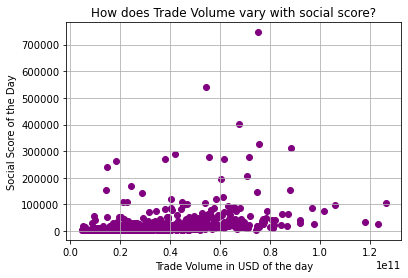

In [23]:
plt.scatter(trade_volume_usd,social_score, c='purple')
plt.ylabel("Social Score of the Day")
plt.xlabel("Trade Volume in USD of the day")
plt.grid()
plt.title("How does Trade Volume vary with social score?")

# Scatter plot seems inconclusive

Text(0.5, 1.0, 'How is social score related to variation in low price?')

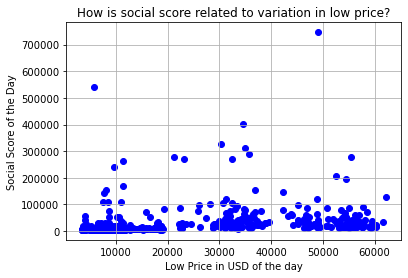

In [24]:
plt.scatter(low_price_usd,social_score, c='blue')
plt.ylabel("Social Score of the Day")
plt.xlabel("Low Price in USD of the day")
plt.grid()
plt.title("How is social score related to variation in low price?")

# Price seems to be going up as social score increases. 
# However, it is not conclusive due to fewer datapoints

Text(0.5, 1.0, 'How is social score related to variation in open price?')

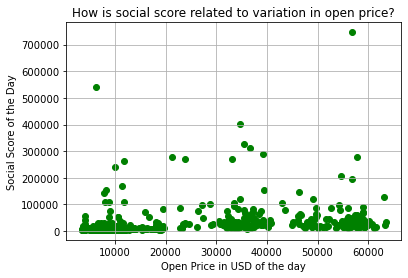

In [25]:
plt.scatter(open_price_usd,social_score, c='green')
plt.ylabel("Social Score of the Day")
plt.xlabel("Open Price in USD of the day")
plt.grid()
plt.title("How is social score related to variation in open price?")

# Similar to Low price

Text(0.5, 1.0, 'Histogram of trade volume in usd over time')

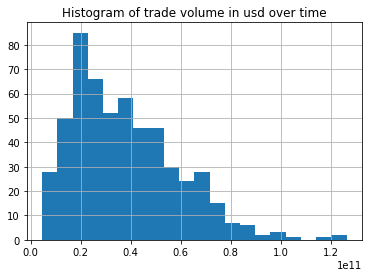

In [26]:

plt.hist(trade_volume_usd,bins=20)
plt.grid()
plt.title("Histogram of trade volume in usd over time")

# Trade Volume seems to be lingering in the lower mid range

Text(0.5, 1.0, 'Histogram of high price in usd over time')

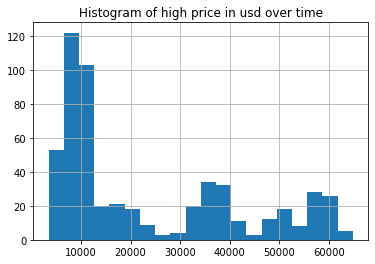

In [27]:

plt.hist(high_price_usd,bins=20)
plt.grid()
plt.title("Histogram of high price in usd over time")

# There are not very many occurrences of high price. High Price lingered in the
# $10000 range for a long time


## Summary of work

1.	Loaded data from various data extracts – flatfile, web and api – into dataframes

2.	Renamed, subsetted and standardized the data type on these dataframes

3.	Loaded them into a sqllite database named bitcoin.db

4.	Combined them into a table called "final" using Python

    a.	Web data was appended to flatfile data
    
    b.	The combination of webdata and flatfile data was inner joined on api data
    
    
5.	Ensured there were no duplicates (where applicable) and no null values in the “final” table

6.	Created visualizations on the combined table “final”

